In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import r2_score

import seaborn as sns

In [99]:
# read the data
# Andreas data
df_inflation = pd.read_csv("./data/data-exam/US_inflation_rates.csv")

In [100]:
df_inflation

date    value
0    1947-01-01   21.480
1    1947-02-01   21.620
2    1947-03-01   22.000
3    1947-04-01   22.000
4    1947-05-01   21.950
..          ...      ...
913  2023-02-01  301.648
914  2023-03-01  301.808
915  2023-04-01  302.918
916  2023-05-01  303.294
917  2023-06-01  303.841

[918 rows x 2 columns]

In [101]:
df_inflation.describe()

value
count  918.000000
mean   117.794828
std     83.736360
min     21.480000
25%     32.105000
50%    106.900000
75%    188.000000
max    303.841000

In [102]:
df_inflation.shape

(918, 2)

## Clean the data

In [103]:
df_inflation.isnull().sum()

date     0
value    0
dtype: int64

<Axes: >

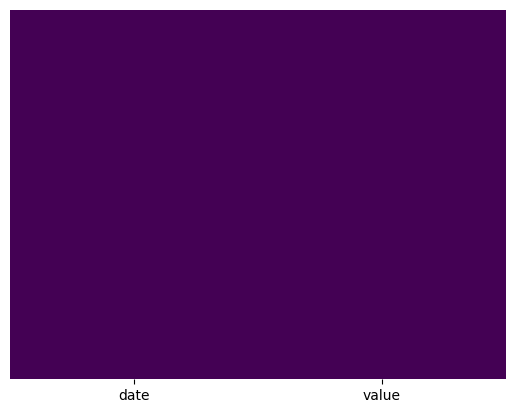

In [104]:
sns.heatmap(df_inflation.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

## Explore the data

In [105]:
df_inflation.describe()

value
count  918.000000
mean   117.794828
std     83.736360
min     21.480000
25%     32.105000
50%    106.900000
75%    188.000000
max    303.841000

In [106]:
df_inflation.sample(5)

date    value
40   1950-05-01   23.770
690  2004-07-01  189.100
97   1955-02-01   26.820
373  1978-02-01   63.000
857  2018-06-01  251.018

In [107]:
# Convert the 'date' column to datetime if it's not already
df_inflation['date'] = pd.to_datetime(df_inflation['date'])

# Extract the year from the 'date' column
df_inflation['year'] = df_inflation['date'].dt.year

In [108]:
# Filter the DataFrame to select years from 1947 to 2023
year_df_inflation = df_inflation[(df_inflation['year'] >= 1947) & (df_inflation['year'] <= 2023)]

In [109]:
# Get the index values of the selected years
index_year_df_inflation = year_df_inflation.index
index_year_df_inflation

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            908, 909, 910, 911, 912, 913, 914, 915, 916, 917],
           dtype='int64', length=918)

In [110]:
# Select columns for X and y based on the data you've shown
X = np.array(index_year_df_inflation).reshape(-1, 1)

In [111]:
X

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [112]:
X[0]

array([0], dtype=int64)

In [113]:
y = df_inflation['value'].values.reshape(-1, 1)

In [114]:
y

array([[ 21.48 ],
       [ 21.62 ],
       [ 22.   ],
       [ 22.   ],
       [ 21.95 ],
       [ 22.08 ],
       [ 22.23 ],
       [ 22.4  ],
       [ 22.84 ],
       [ 22.91 ],
       [ 23.06 ],
       [ 23.41 ],
       [ 23.68 ],
       [ 23.67 ],
       [ 23.5  ],
       [ 23.82 ],
       [ 24.01 ],
       [ 24.15 ],
       [ 24.4  ],
       [ 24.43 ],
       [ 24.36 ],
       [ 24.31 ],
       [ 24.16 ],
       [ 24.05 ],
       [ 24.01 ],
       [ 23.91 ],
       [ 23.91 ],
       [ 23.92 ],
       [ 23.91 ],
       [ 23.92 ],
       [ 23.7  ],
       [ 23.7  ],
       [ 23.75 ],
       [ 23.67 ],
       [ 23.7  ],
       [ 23.61 ],
       [ 23.51 ],
       [ 23.61 ],
       [ 23.64 ],
       [ 23.65 ],
       [ 23.77 ],
       [ 23.88 ],
       [ 24.07 ],
       [ 24.2  ],
       [ 24.34 ],
       [ 24.5  ],
       [ 24.6  ],
       [ 24.98 ],
       [ 25.38 ],
       [ 25.83 ],
       [ 25.88 ],
       [ 25.92 ],
       [ 25.99 ],
       [ 25.93 ],
       [ 25.91 ],
       [ 2

In [142]:
y[917]

array([303.841])

In [115]:
df_inflation.sample(5)

date   value  year
447 1984-04-01  103.30  1984
37  1950-02-01   23.61  1950
532 1991-05-01  135.60  1991
44  1950-09-01   24.34  1950
535 1991-08-01  136.60  1991

In [122]:
y[738]

array([219.016])

In [ ]:
# Filter the DataFrame to select years from 1947 to 2023
#selected_years_df = df_inflation[(df_inflation['year'] >= 1947) & (df_inflation['year'] <= 2023)]

## Training the set

In [123]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [127]:
X_test

array([[306],
       [711],
       [298],
       [466],
       [253],
       [230],
       [906],
       [ 14],
       [202],
       [ 31],
       [532],
       [420],
       [408],
       [631],
       [145],
       [441],
       [521],
       [390],
       [247],
       [812],
       [249],
       [236],
       [338],
       [523],
       [285],
       [ 65],
       [142],
       [671],
       [566],
       [252],
       [478],
       [150],
       [ 97],
       [658],
       [447],
       [ 77],
       [817],
       [726],
       [372],
       [830],
       [ 55],
       [214],
       [175],
       [789],
       [415],
       [231],
       [271],
       [382],
       [513],
       [916],
       [363],
       [799],
       [667],
       [424],
       [385],
       [826],
       [887],
       [862],
       [436],
       [657],
       [752],
       [384],
       [264],
       [200],
       [350],
       [860],
       [412],
       [596],
       [718],
       [ 60],
       [793],
      

In [128]:
# Fitting Linear Regression to the dataset

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

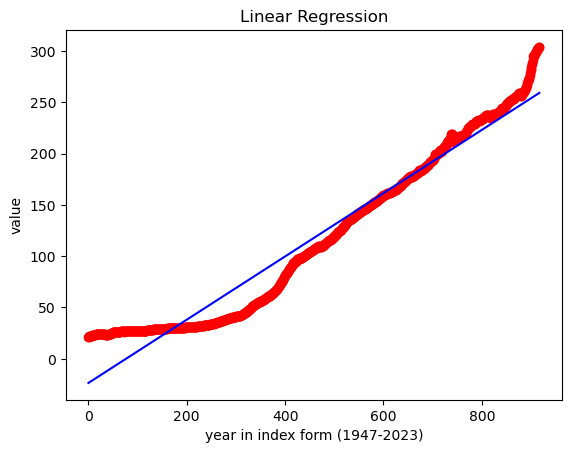

In [129]:
# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Linear Regression')
    plt.xlabel('year in index form (1947-2023)')
    plt.ylabel('value')
    plt.show()
    return
viz_linear()

In [130]:
# Fitting Polynomial Regression to the dataset

poly_model = PolynomialFeatures(degree=5)
X_poly = poly_model.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

In [131]:
y_predict = pol_reg.predict(X_poly)

In [132]:
# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, y_predict , color='blue')
    plt.title('Polynomia Regression)')
    plt.xlabel('year in index form (1947-2023)')
    plt.ylabel('value')
    plt.show()
    return

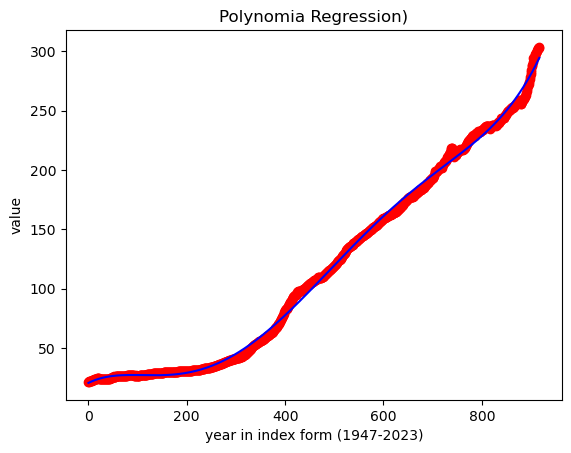

In [133]:
viz_polymonial()

In [134]:
# Additional feature
# Making the plot line more smooth
def viz_polymonial_smooth():
    X_grid = np.arange(min(X), max(X), 0.1)
    X_grid = X_grid.reshape(len(X_grid), 1) #Why do we need to reshape? (https://www.tutorialspoint.com/numpy/numpy_reshape.htm)
    # Visualizing the Polymonial Regression results
    plt.scatter(X, y, color='red')
    plt.plot(X_grid, pol_reg.predict(poly_model.fit_transform(X_grid)), color='blue')
    plt.title('Polynomial Regression')
    plt.xlabel('year in index form (1947-2023)')
    plt.ylabel('value')
    plt.show()
    return

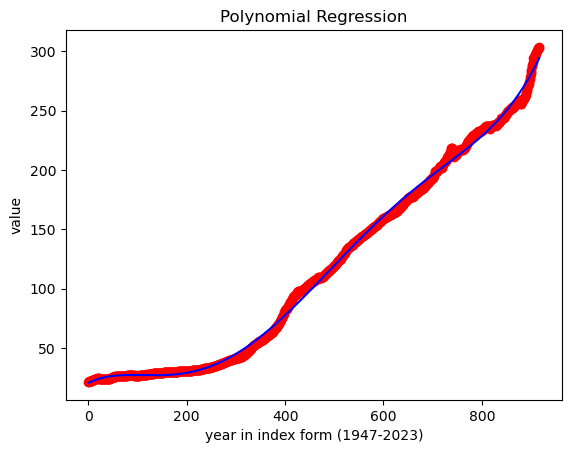

In [135]:
viz_polymonial_smooth()

In [136]:
# Predicting a new result with Linear Regression
lin_reg.predict([[100]])
#output would be 249500

array([[7.33717904]])

In [137]:
# Predicting a new result with Linear Regression
#lin_reg.predict([[100]])
#output would be 249500

#array([[7.33717904]])

In [143]:
# Predicting a new result with Polymonial Regression
pol_reg.predict(poly_model.fit_transform([[1008]]))
#output should be 132148.43750003

array([[412.6255249]])

In [ ]:
# Predicting a new result with Polymonial Regression
#pol_reg.predict(poly_model.fit_transform([[638]]))
#output should be 132148.43750003

#array([[175.28375538]])

In [139]:
# Calculate R-squared score for Polynomial Regression
r2_score_poly = r2_score(y, y_predict)
print(f'R-squared (R^2) score for Polynomial Regression: {r2_score_poly:.5f}')

R-squared (R^2) score for Polynomial Regression: 0.99791


1 = 0.95184
2 = 0.98781
3 = 0.99487
4 = 0.99519

5 = 0.99791 H

6 = 0.99767
7 = 0.99773

In [144]:
!dir

 Volume in drive C is Windows-SSD
 Volume Serial Number is 642F-8081

 Directory of C:\Users\Andre\Documents\CPH Business 4\BI\Exercises 2023

12-10-2023  17:59    <DIR>          .
22-08-2023  12:01    <DIR>          ..
12-10-2023  15:59    <DIR>          .ipynb_checkpoints
02-09-2023  20:50             8.336 Assignment.ipynb
03-09-2023  21:26                46 Assignment1Python.txt
09-10-2023  20:35            37.037 Business Intelligence Fall 2023 Exam Project copy.ipynb
11-10-2023  15:07           512.127 Business Intelligence Fall 2023 Exam Project copy2.ipynb
07-09-2023  11:06               855 cosimfunc.py
03-09-2023  21:12        11.796.546 Crazy Frog - Axel F (Official Video).mp4
09-10-2023  16:37    <DIR>          data
29-08-2023  08:20         4.421.156 Data and Data Exploration.pdf
20-09-2023  09:51             1.378 DeleteTesting.ipynb
06-10-2023  09:42    <DIR>          deploy
22-08-2023  12:02           144.215 E-01-PythonTechStack (1).pdf
22-08-2023  09:53           144.